In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
color_dict = {'reddit': '#FF5700',
              'twitter': '#00acee',
              'youtube': '#FF0000'}

In [3]:
ex_daily_df = pd.read_csv('extrinsic_hot_prevalence_estimation_2022.csv')
ex_daily_df.index = ex_daily_df.date
ex_daily_df.index = pd.to_datetime(ex_daily_df.index)

ex_weekly_df = ex_daily_df.resample('W-Mon').sum().reset_index()
ex_weekly_df.index = ex_weekly_df.date
ex_weekly_df.index = pd.to_datetime(ex_weekly_df.index)

in_daily_df = pd.read_csv('intrinsic_hot_prevalence_estimation_2022.csv')
in_daily_df.index = in_daily_df.date
in_daily_df.index = pd.to_datetime(in_daily_df.index)

in_weekly_df = in_daily_df.resample('W-Mon').sum().reset_index()
in_weekly_df.index = in_weekly_df.date
in_weekly_df.index = pd.to_datetime(in_weekly_df.index)

In [4]:
ex_daily_df['reddit_num_comment_list'].sum() / 365

5631.435616438356

In [5]:
ex_daily_df['twitter_num_comment_list'].sum() / 365

5355.712328767123

In [6]:
ex_daily_df['youtube_num_comment_list'].sum() / 365

4271.243835616438

In [7]:
ex_daily_df = pd.read_csv('extrinsic_hot_prevalence_estimation_2022.csv')
ex_daily_df.index = ex_daily_df.date
ex_daily_df.index = pd.to_datetime(ex_daily_df.index)

in_daily_df = pd.read_csv('intrinsic_hot_prevalence_estimation_2022.csv')
in_daily_df.index = in_daily_df.date
in_daily_df.index = pd.to_datetime(in_daily_df.index)

old_ex_daily_df = pd.read_csv('old_extrinsic_hot_prevalence_estimation_2022.csv')
old_ex_daily_df.index = old_ex_daily_df.date
old_ex_daily_df.index = pd.to_datetime(old_ex_daily_df.index)

In [9]:
def visualize_time_series(data_df):
    fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharey=True)

    platform_list = ['reddit', 'twitter', 'youtube']
    # metric_list = ['hot', 'hate', 'offensive', 'toxic']
    metric_list = ['toxic']
    for ax_idx, metric in enumerate(metric_list):
        for platform in platform_list:
            color = color_dict[platform]

            axes[ax_idx].plot_date(
                data_df.index, 
                eval(f'data_df.{platform}_{metric}_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
                '-o', color=color, mfc='none', ms=2, label=platform)
            axes[ax_idx].fill_between(
                data_df.index, 
                eval(f'data_df.{platform}_{metric}_ub_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
                eval(f'data_df.{platform}_{metric}_lb_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
                color=color, alpha=0.2)

            axes[ax_idx].set_title(metric, fontsize=16)
            print(metric, platform, eval(f'data_df.{platform}_{metric}_list').sum() / 365)

    for ax in axes.ravel():
        # ax.legend(frameon=False, fontsize=14)
        ax.set_ylabel('prevalence', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    plt.tight_layout()

toxic reddit 439.44587445322406
toxic twitter 506.03037788360785
toxic youtube 553.4166556280387


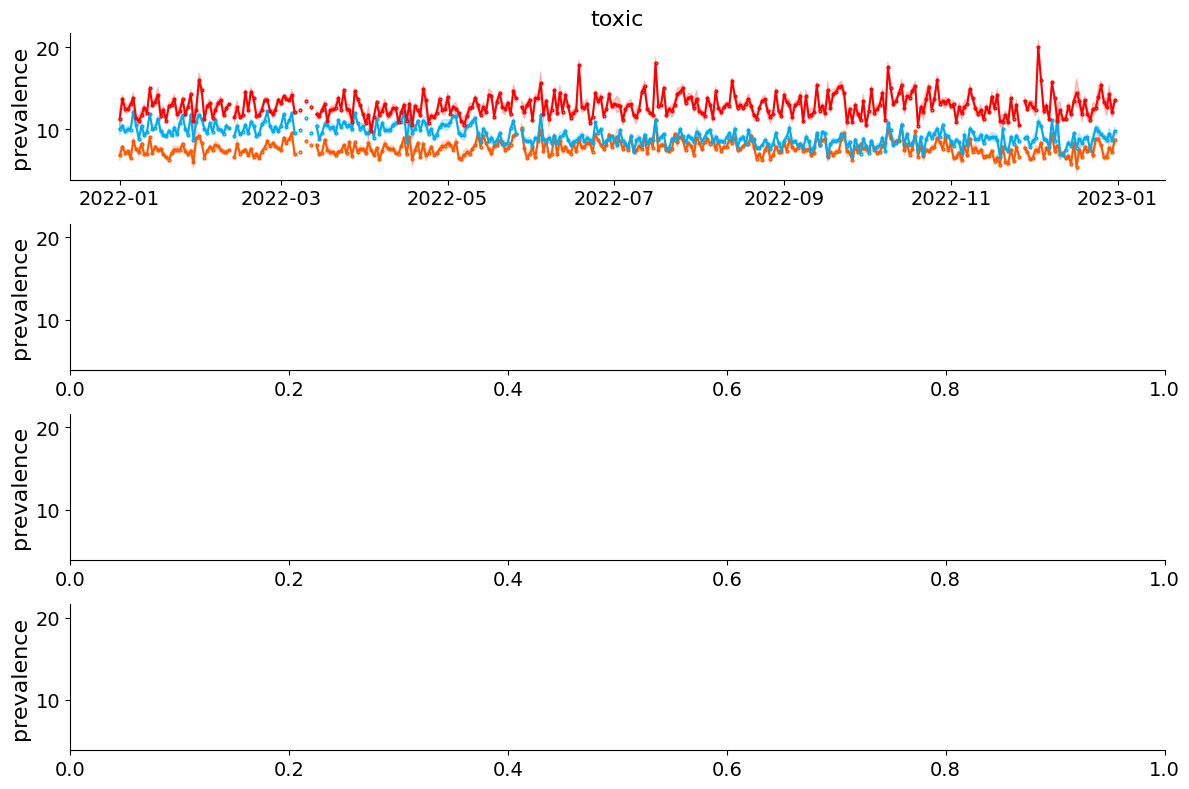

In [10]:
visualize_time_series(ex_daily_df)

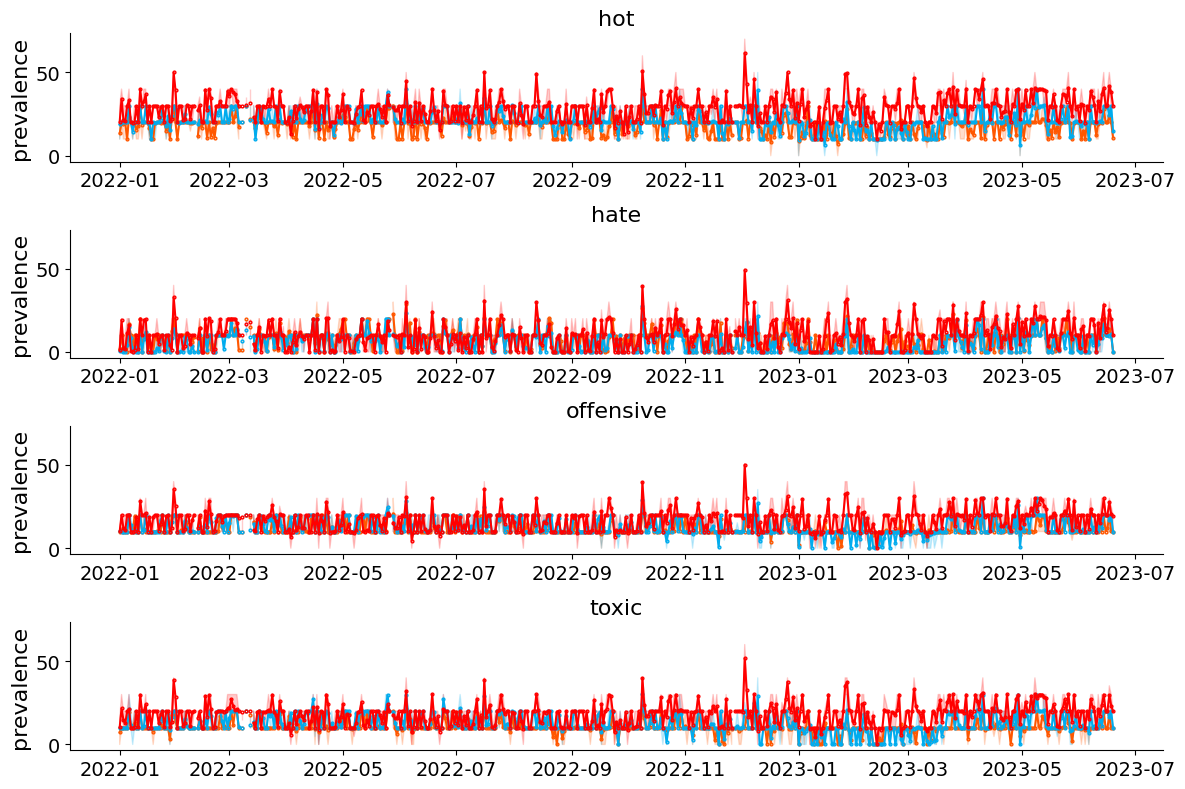

In [6]:
visualize_time_series(in_daily_df)

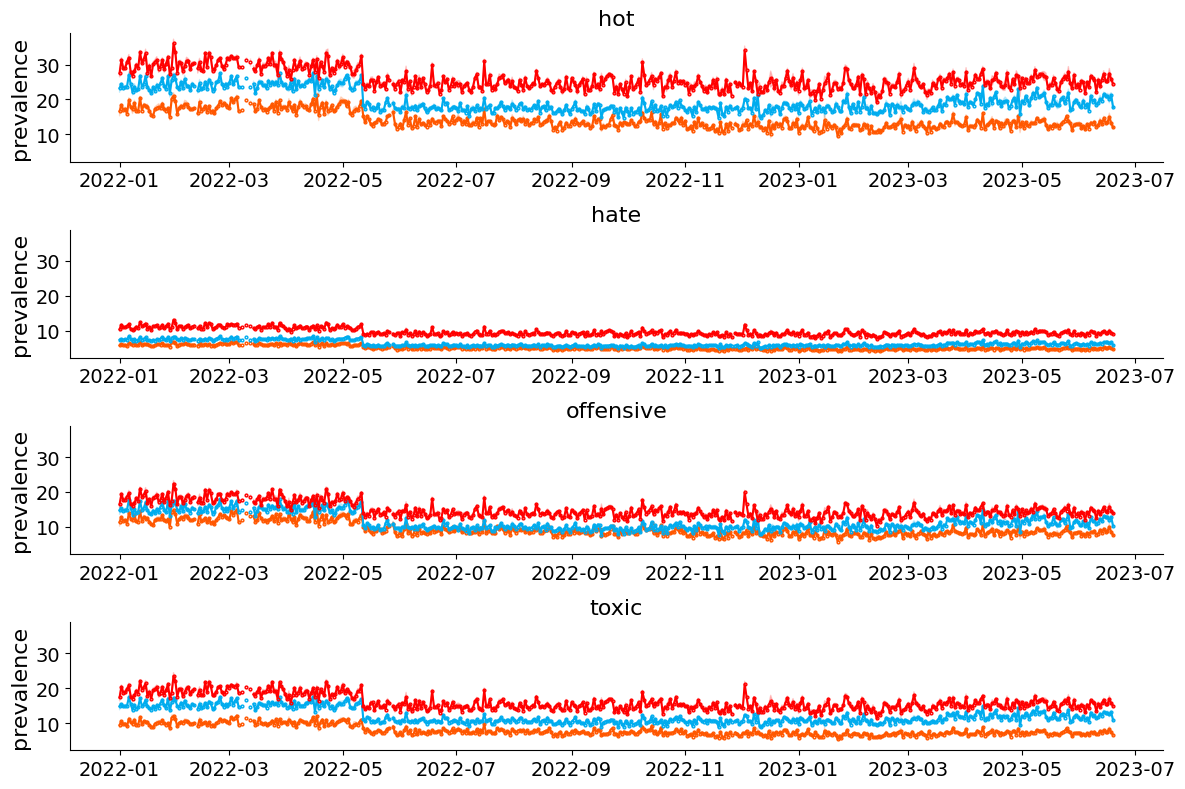

In [7]:
visualize_time_series(old_ex_daily_df)

## Group by week

In [8]:
ex_weekly_df = ex_daily_df.resample('W-Mon').sum().reset_index()
ex_weekly_df.index = ex_weekly_df.date
ex_weekly_df.index = pd.to_datetime(ex_weekly_df.index)

in_weekly_df = in_daily_df.resample('W-Mon').sum().reset_index()
in_weekly_df.index = in_weekly_df.date
in_weekly_df.index = pd.to_datetime(in_weekly_df.index)

old_ex_weekly_df = old_ex_daily_df.resample('W-Mon').sum().reset_index()
old_ex_weekly_df.index = old_ex_weekly_df.date
old_ex_weekly_df.index = pd.to_datetime(old_ex_weekly_df.index)

NameError: name 'in_daily_df' is not defined

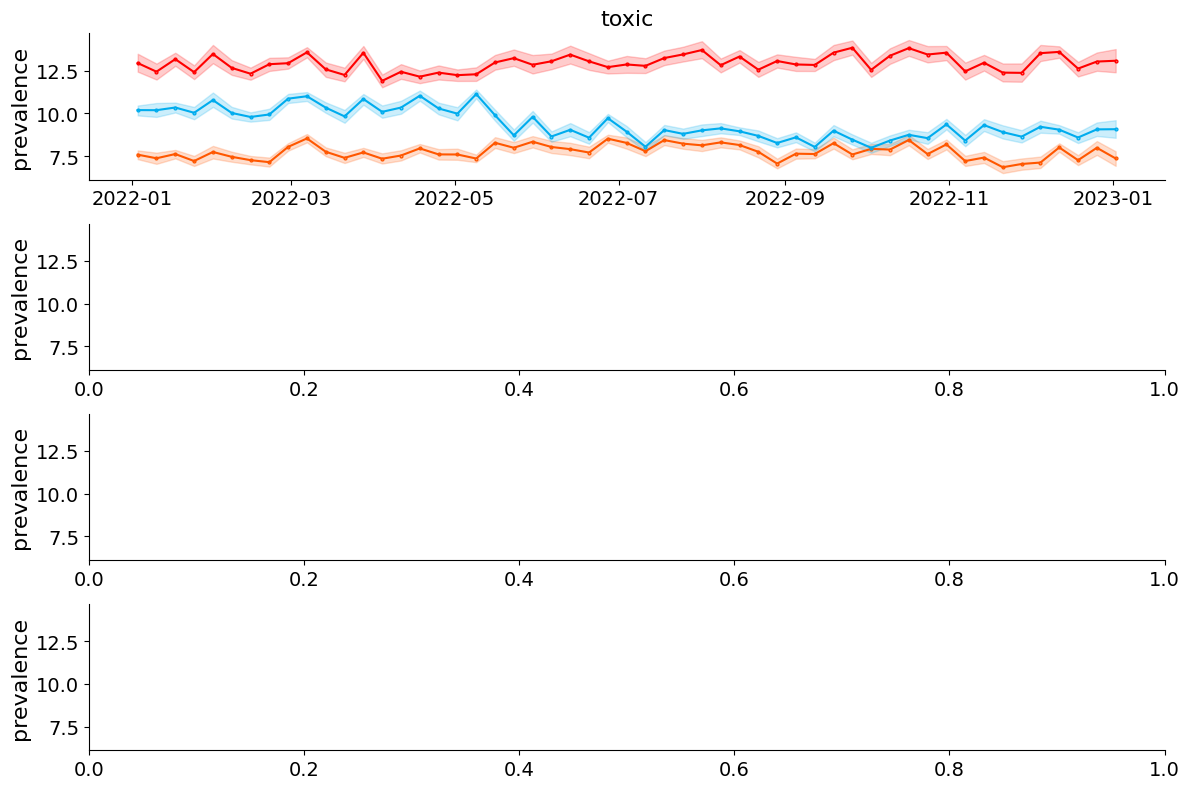

In [9]:
visualize_time_series(ex_weekly_df)

toxic reddit 276.05445753424664
toxic twitter 199.7106180821918
toxic youtube 368.94169999999997


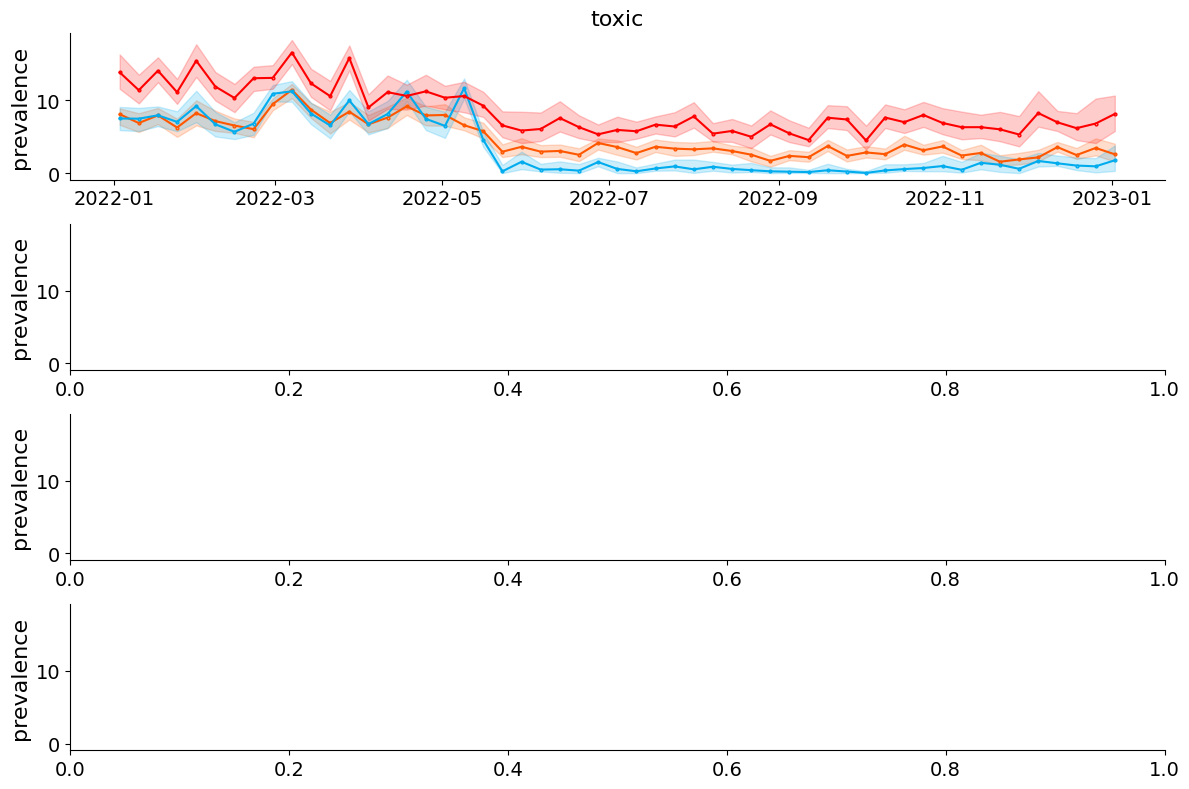

In [11]:
visualize_time_series(in_weekly_df)

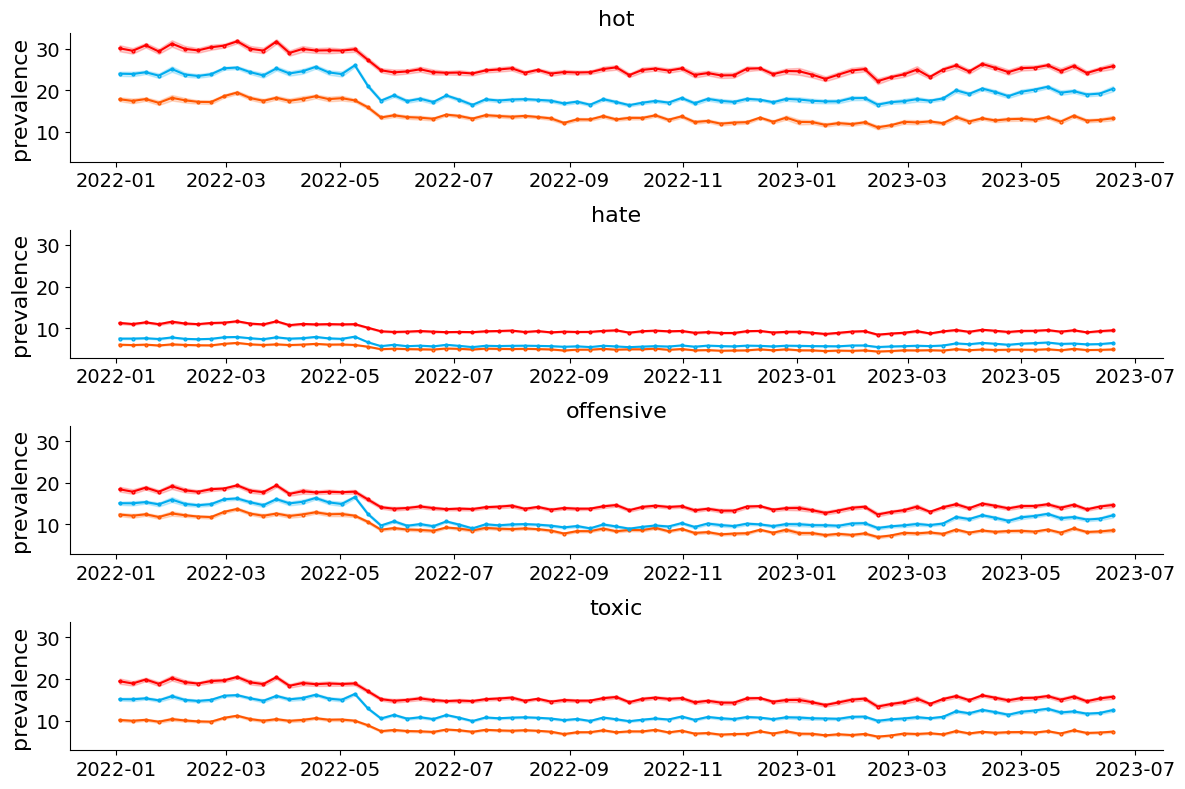

In [11]:
visualize_time_series(old_ex_weekly_df)

In [36]:
def visualize_time_series2(data_df):
    fig, axes = plt.subplots(3, 1, figsize=(12, 6.6), sharey=True)

    platform_list = ['reddit', 'twitter', 'youtube']
    metric = 'toxic'
    for ax_idx, platform in enumerate(platform_list):
        color = color_dict[platform]

        axes[ax_idx].plot_date(
            data_df.index, 
            eval(f'data_df.{platform}_{metric}_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
            '-o', color=color, mfc='none', ms=5, label='with calibration')
        
        print(np.mean(eval(f'data_df.{platform}_{metric}_list') / eval(f'data_df.{platform}_num_comment_list') * 100))

        axes[ax_idx].fill_between(
            data_df.index, 
            eval(f'data_df.{platform}_{metric}_ub_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
            eval(f'data_df.{platform}_{metric}_lb_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
            color=color, alpha=0.2)

        axes[ax_idx].plot_date(
            data_df.index, 
            eval(f'data_df.{platform}_toxic_notcalib_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
            '--', color=color, mfc='none', ms=5, label='without calibration')
        
        # add a vertical line at 2021-01-06
        axes[ax_idx].axvline(pd.to_datetime('2022-05-16'), color='black', linestyle='--', alpha=0.5)

        axes[ax_idx].set_title(platform, fontsize=18)

    for ax in axes.ravel():
        ax.set_ylabel('prevalence', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    axes[1].legend(frameon=False, fontsize=14, loc='upper right', ncol=3)

    plt.tight_layout()
    plt.savefig('extrinsic_hot_prevalence_estimation_2022.pdf', dpi=300)

7.7473140354265855
9.389196977693766
12.930336446923219


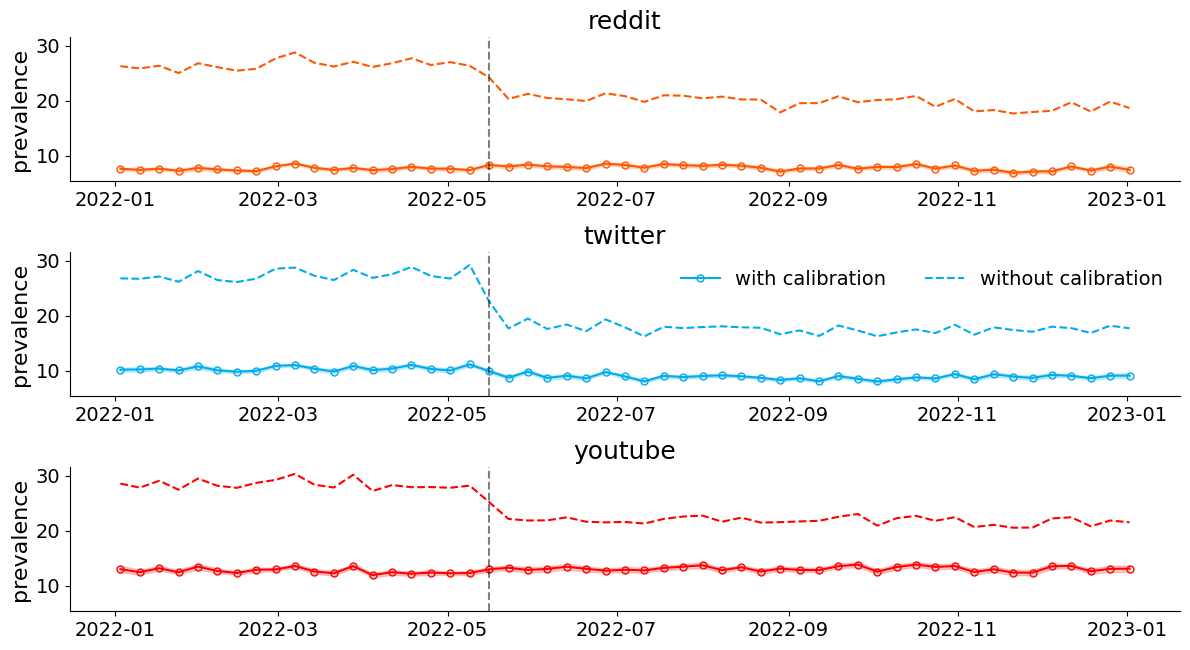

In [35]:
visualize_time_series2(ex_weekly_df)

4.727641738085887
3.500125539765849
8.586232566218884


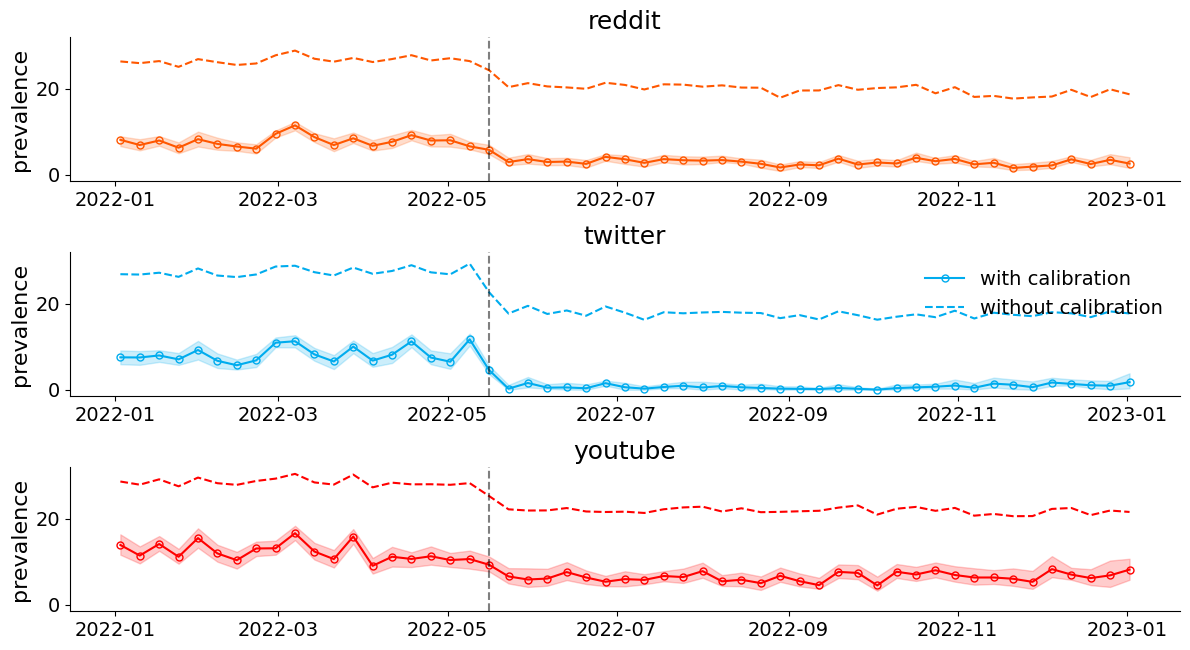

In [14]:
visualize_time_series2(in_weekly_df)

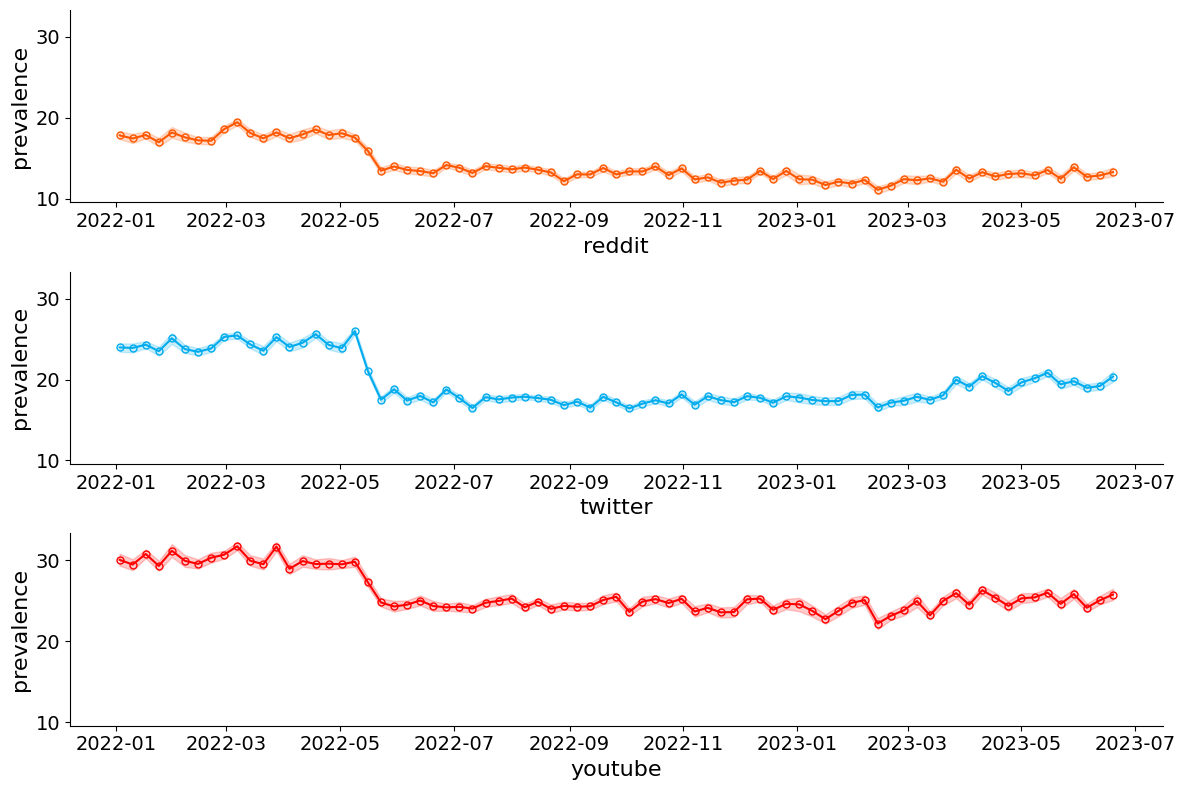

In [15]:
visualize_time_series2(old_ex_weekly_df)

In [122]:
def visualize_time_series3(data_df1, data_df2, label1, label2):
    fig, axes = plt.subplots(3, 1, figsize=(9, 6), sharey=True, sharex=True)

    platform_list = ['reddit', 'twitter', 'youtube']
    metric = 'toxic'
    for ax_idx, platform in enumerate(platform_list):
        color = color_dict[platform]

        axes[ax_idx].plot_date(
            data_df1.index, 
            eval(f'data_df1.{platform}_{metric}_list') / eval(f'data_df1.{platform}_num_comment_list') * 100, 
            '-o', color=color, mfc='none', ms=6, label=label1)
        axes[ax_idx].fill_between(
            data_df1.index, 
            eval(f'data_df1.{platform}_{metric}_ub_list') / eval(f'data_df1.{platform}_num_comment_list') * 100, 
            eval(f'data_df1.{platform}_{metric}_lb_list') / eval(f'data_df1.{platform}_num_comment_list') * 100, 
            color=color, alpha=0.2)
        axes[ax_idx].set_xlabel(platform, fontsize=16)

        axes[ax_idx].plot_date(
            data_df2.index, 
            eval(f'data_df2.{platform}_{metric}_list') / eval(f'data_df2.{platform}_num_comment_list') * 100, 
            '--', color=color, mfc='none', ms=5, label=label2)
        axes[ax_idx].fill_between(
            data_df2.index, 
            eval(f'data_df2.{platform}_{metric}_ub_list') / eval(f'data_df2.{platform}_num_comment_list') * 100, 
            eval(f'data_df2.{platform}_{metric}_lb_list') / eval(f'data_df2.{platform}_num_comment_list') * 100, 
            color=color, alpha=0.2)
        
        axes[ax_idx].plot_date(
            data_df1.index, 
            eval(f'data_df1.{platform}_{metric}_notcalib_list') / eval(f'data_df1.{platform}_num_comment_list') * 100, 
            '--', color='k', mfc='none', ms=5, label='without calibration')
        
        axes[ax_idx].axvline(pd.to_datetime('2022-05-16'), color='black', linestyle='--', alpha=0.5)


    for ax in axes.ravel():
        ax.set_ylabel('prevalence', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_ylim(ymax=35)
        # ax.set_ylim(ymin=0)
        ax.set_yticks([10, 30])
    # axes[1].legend(frameon=False, fontsize=13, loc='upper right', ncol=1)

    plt.tight_layout()
    plt.savefig('figures/toxicity_prevalence_estimation_2022.pdf', dpi=300, bbox_inches='tight')

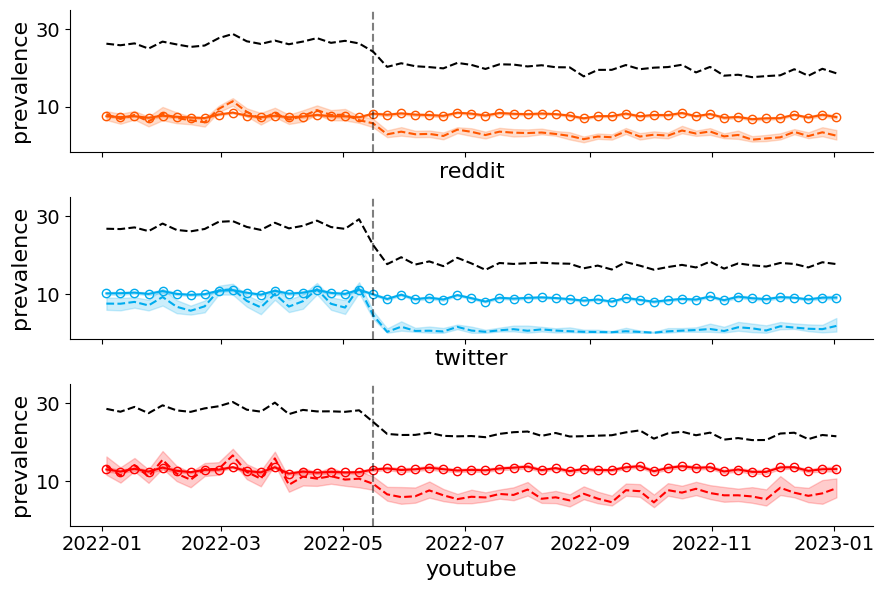

In [123]:
visualize_time_series3(ex_weekly_df, in_weekly_df, 'assumed stable calibration curve', 'assumed stable class-conditional densities')

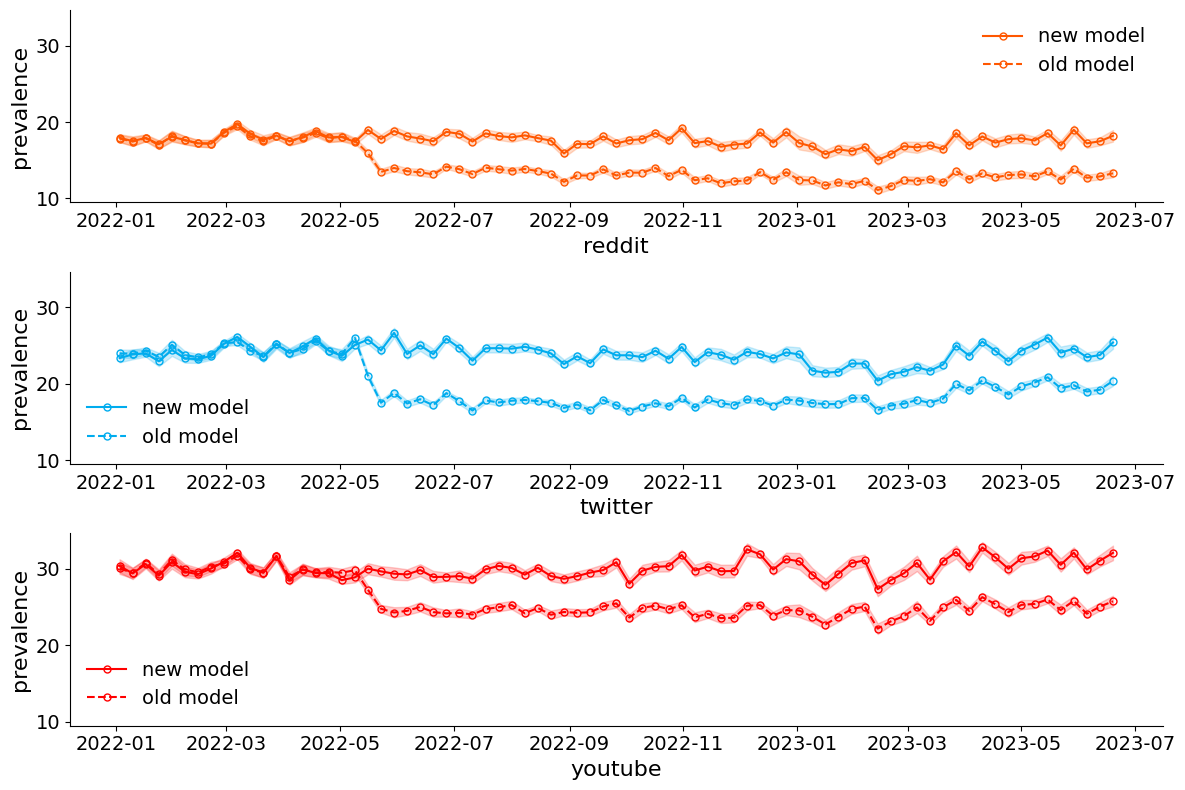

In [18]:
visualize_time_series3(ex_weekly_df, old_ex_weekly_df, 'new model', 'old model')

In [29]:
def visualize_time_series4(data_df):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    platform_list = ['youtube', 'twitter', 'reddit']
    metric = 'toxic'
    for ax_idx, platform in enumerate(platform_list):
        color = color_dict[platform]

        ax.plot_date(
            data_df.index, 
            eval(f'data_df.{platform}_{metric}_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
            '-o', color=color, mfc='none', ms=5, label=platform)
        ax.fill_between(
            data_df.index, 
            eval(f'data_df.{platform}_{metric}_ub_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
            eval(f'data_df.{platform}_{metric}_lb_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
            color=color, alpha=0.2)

    ax.legend(frameon=False, fontsize=16)
    ax.set_ylabel('prevalence', fontsize=16)
    ax.set_ylim(5, 20)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.tight_layout()

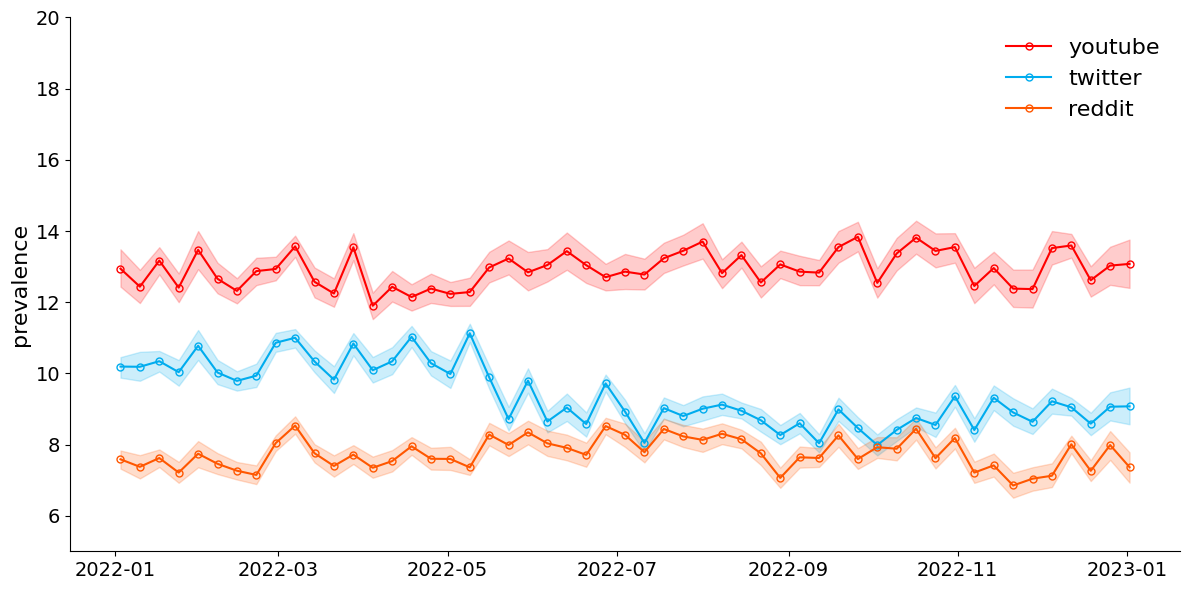

In [30]:
visualize_time_series4(ex_weekly_df)